In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_gray = cv2.imread(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 6\albert-einstein_gray.jpg')

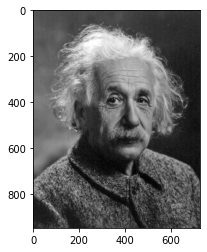

In [3]:
plt.imshow(img_gray, cmap='gray')

In [16]:
th = 150
ret, bin_img = cv2.threshold(img_gray, th, 255, cv2.THRESH_BINARY)

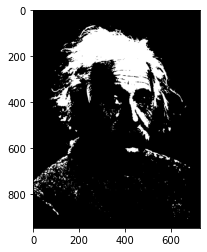

In [17]:
plt.imshow(bin_img, cmap='gray')

# Structuring Elements

In [14]:
K_r = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
K_r

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [7]:
K_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
K_e

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=uint8)

In [22]:
K_x = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
K_x

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

# Erosion example

In [23]:
E_r = cv2.erode(bin_img, K_r)
E_e = cv2.erode(bin_img, K_e)
E_x = cv2.erode(bin_img, K_x)

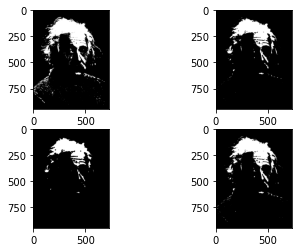

In [24]:
plt.subplot(221)
plt.imshow(bin_img)
plt.subplot(222)
plt.imshow(E_r)
plt.subplot(223)
plt.imshow(E_e)
plt.subplot(224)
plt.imshow(E_x)

In [25]:
np.sum((E_r - E_e)**2)

39135

# Dilation Example

In [26]:
D_r = cv2.dilate(bin_img, K_r)
D_e = cv2.dilate(bin_img, K_e)
D_x = cv2.dilate(bin_img, K_x)

(-0.5, 727.5, 948.5, -0.5)

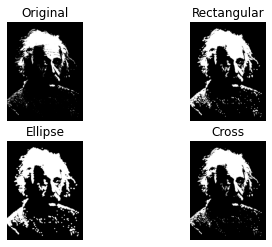

In [29]:
plt.subplot(221)
plt.imshow(bin_img)
plt.title("Original")
plt.axis('off')
plt.subplot(222)
plt.imshow(D_r)
plt.title("Rectangular")
plt.axis('off')
plt.subplot(223)
plt.imshow(D_e)
plt.title("Ellipse")
plt.axis('off')
plt.subplot(224)
plt.imshow(D_x)
plt.title("Cross")
plt.axis('off')

# Opening: Erosion followed by dillation

In [30]:
bin_img.dtype

dtype('uint8')

In [32]:
im_bool = np.array(bin_img[:,:,0], dtype=np.bool8)

In [33]:
im_bool.dtype

dtype('bool')

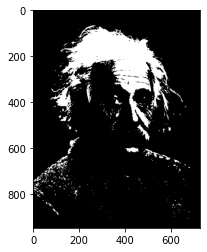

In [34]:
plt.imshow(im_bool, cmap='gray')

In [36]:
N = np.random.rand(im_bool.shape[0], im_bool.shape[1])

In [46]:
N_binary = N>0.90

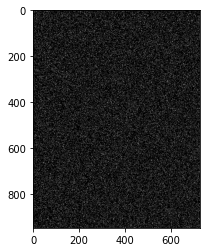

In [47]:
plt.imshow(N_binary, cmap='gray')

In [48]:
img_N = im_bool | N_binary

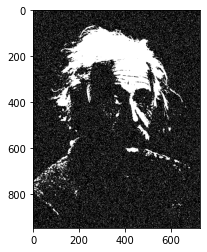

In [49]:
plt.imshow(img_N, cmap="gray")

In [50]:
O_r = cv2.morphologyEx(np.float32(img_N), cv2.MORPH_OPEN, K_r)

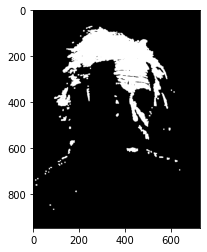

In [51]:
plt.imshow(O_r, cmap='gray')

In [52]:
E_r = cv2.erode(np.float32(img_N), K_r)
O_r = cv2.dilate(E_r, K_r)

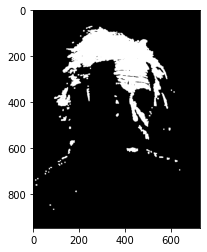

In [53]:
plt.imshow(O_r, cmap='gray')

# Closing: Dillation followed by Erosion

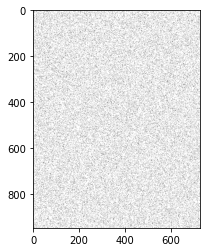

In [54]:
N_binary = N<0.90
plt.imshow(N_binary, cmap='gray')

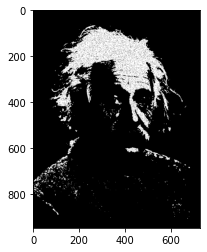

In [55]:
img_H = im_bool & N_binary
plt.imshow(img_H, cmap='gray')

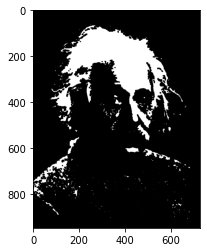

In [64]:
C_r = cv2.morphologyEx(np.float32(img_H), cv2.MORPH_CLOSE, K_r)
plt.imshow(C_r, cmap='gray')

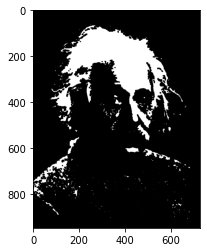

In [60]:
E_r = cv2.dilate(np.float32(img_H), K_r)
C_r = cv2.erode(E_r, K_r)
plt.imshow(C_r, cmap='gray')

# Gradient: Substract Dillation from Erosion

In [65]:
G_r = cv2.morphologyEx(C_r, cv2.MORPH_GRADIENT, K_r)


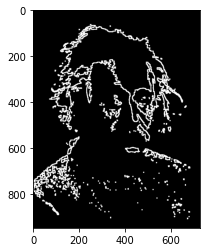

In [66]:
plt.imshow(G_r, cmap='gray')

# Top Hat and Black Hat

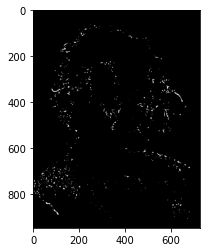

In [70]:
TH_r = cv2.morphologyEx(C_r, cv2.MORPH_TOPHAT, K_r)
plt.imshow(TH_r, cmap='gray')

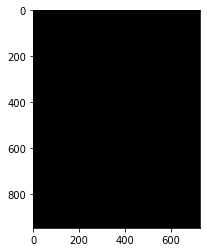

In [69]:
BH_r = cv2.morphologyEx(C_r, cv2.MORPH_BLACKHAT, K_r)
plt.imshow(BH_r, cmap='gray')